In [6]:
# imports 
import pandas as pd
import numpy as np
import csv

# read file 
def read_file(filepath):
    df = pd.read_csv(filepath)
    return df

df = read_file("311.csv")


df1 = df[['ontime', 'neighborhood']]
df1.head(10)





ontime                            neighborhood
0  OVERDUE                               Hyde Park
1   ONTIME           Downtown / Financial District
2   ONTIME                              Dorchester
3  OVERDUE                               Hyde Park
4  OVERDUE                             Charlestown
5   ONTIME  South Boston / South Boston Waterfront
6   ONTIME                              Dorchester
7  OVERDUE                           Jamaica Plain
8   ONTIME           Downtown / Financial District
9   ONTIME                              Dorchester

In [7]:
# function replaces 'OVERDUE' with 0 and 'ONTIME' with 1
def to_numerical(df):
    df['ontime'].replace(['ONTIME','OVERDUE'], [1,0], inplace=True)
    return df['ontime']


df1['ontime'] = to_numerical(df)
df1.head(10)

/var/folders/28/k_0b83n90054zf3kf809sw6m0000gp/T/ipykernel_37327/3367958376.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ontime'] = to_numerical(df)


ontime                            neighborhood
0       0                               Hyde Park
1       1           Downtown / Financial District
2       1                              Dorchester
3       0                               Hyde Park
4       0                             Charlestown
5       1  South Boston / South Boston Waterfront
6       1                              Dorchester
7       0                           Jamaica Plain
8       1           Downtown / Financial District
9       1                              Dorchester

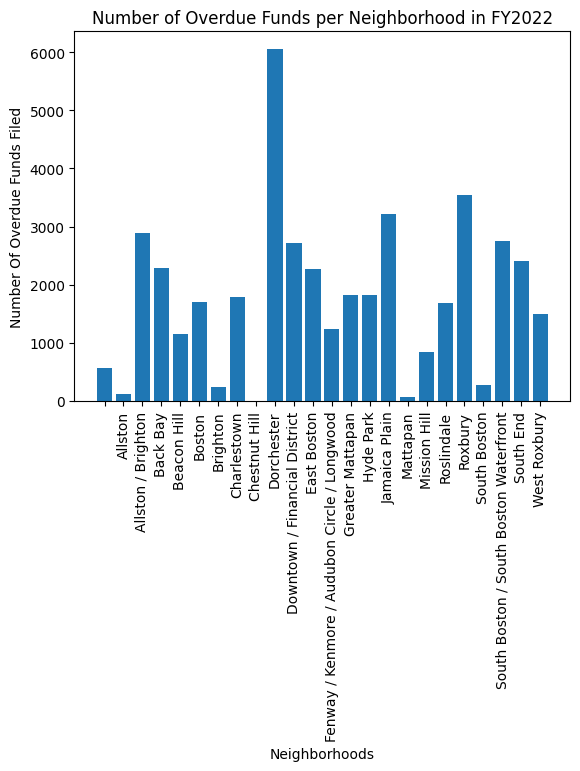

In [20]:
# grouping neighborhood and ontime 
import matplotlib.pyplot as plt
overdue = df1[df1['ontime'] == 0]
group = overdue.groupby('neighborhood')['ontime'].count()
plt.bar(group.index, group)
plt.xticks(rotation=90)
plt.title('Number of Overdue Funds per Neighborhood in FY2022')
plt.xlabel('Neighborhoods')
plt.ylabel('Number Of Overdue Funds Filed')
plt.show()

In [17]:
print('Crosstable of overdue funds and neighborhood:')
print(df1.groupby('neighborhood').ontime.value_counts())

Crosstable of overdue funds and neighborhood:
neighborhood                                  ontime
                                              1          1717
                                              0           571
Allston                                       1           610
                                              0           127
Allston / Brighton                            1         15205
                                              0          2895
Back Bay                                      1         10793
                                              0          2288
Beacon Hill                                   1          7149
                                              0          1155
Boston                                        1          7542
                                              0          1709
Brighton                                      1          1141
                                              0           247
Charlestown                      

In [31]:
import folium 
from folium.plugins import HeatMap

# 42.3601 ; 71.0588

df2 = df[['ontime', 'latitude', 'longitude']]


base_map = folium.Map(location=[42.3601, -71.0588])
hm = HeatMap(df2)
base_map.add_child(hm)
base_map


In [52]:
# Time graph overdue funds vs financial years 2022, 2021, 2020, 2019, 2018

def to_numerical2(df):
    df.replace(['ONTIME','OVERDUE'], [1,0], inplace=True)
    return df

df2022 = df1['ontime']


df2021 = read_file("2021.csv")
df2021 = df2021['ontime']
df2021 = to_numerical2(df2021)

df2020 = read_file("2020.csv")
df2020 = df2020['ontime']
df2021 = to_numerical2(df2020)

df2019 = read_file("2019.csv")
df2019 = df2019['ontime']
df2021 = to_numerical2(df2019)

df2018 = read_file("2018.csv")
df2018 = df2018['ontime']
df2021 = to_numerical2(df2018) 



/var/folders/28/k_0b83n90054zf3kf809sw6m0000gp/T/ipykernel_37327/3020369049.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [53]:

# finding ratios
def ratios(df):
    num_overdue = 0
    num_ontime = 0
    # counting female and male survivers:
    for i in range(len(df)):
        if (df[i] == 0): 
            num_overdue += 1
        elif (df[i] == 1):
            num_ontime += 1


    # finding ratios:
    total = num_overdue + num_ontime
    ratio_overdue = num_overdue/ total
    ratio_ontime = 1 - ratio_overdue
    return total, ratio_overdue, ratio_ontime

total2022, overdue2022, ontime2022 = ratios(df2022)
total2021, overdue2021, ontime2021 = ratios(df2021)
total2020, overdue2020, ontime2020 = ratios(df2020)
total2019, overdue2019, ontime2019 = ratios(df2019)
total2018, overdue2018, ontime2018 = ratios(df2018)


In [54]:
print(total2022, overdue2022, ontime2022)
print(total2021, overdue2021, ontime2021)
print(total2020, overdue2020, ontime2020)
print(total2019, overdue2019, ontime2019)
print(total2018, overdue2018, ontime2018)

261003 0.1651053819304759 0.8348946180695241
263104 0.193600249331063 0.806399750668937
251374 0.1699817801363705 0.8300182198636294
259495 0.18157960654347868 0.8184203934565213
263104 0.193600249331063 0.806399750668937


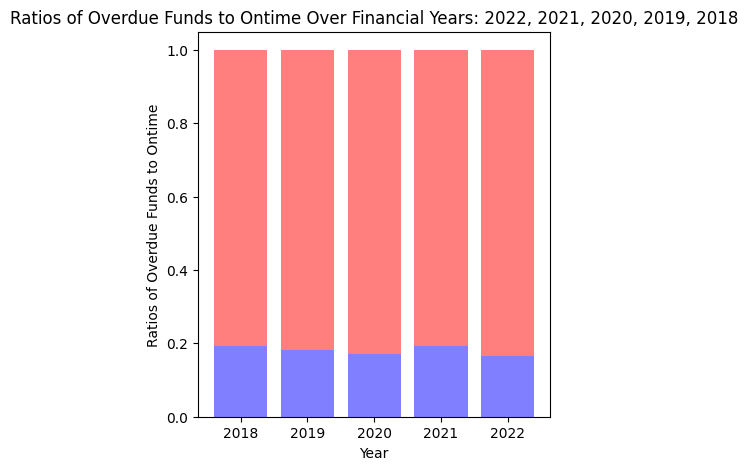

In [56]:
# plot
year = [2022, 2021, 2020, 2019, 2018]
data_overdue = [overdue2022, overdue2021, overdue2020, overdue2019, overdue2018]
data_ontime = [ontime2022, ontime2021, ontime2020,ontime2019, ontime2018 ]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.bar(year, data_overdue, label='Overdue', alpha=0.5, color='b')
ax1.bar(year, data_ontime, bottom = data_overdue, label='Ontime', alpha=0.5, color='r')
plt.sca(ax1)
ax2.remove()
plt.title('Ratios of Overdue Funds to Ontime Over Financial Years: 2022, 2021, 2020, 2019, 2018')
plt.xlabel('Year')
plt.ylabel('Ratios of Overdue Funds to Ontime')
plt.show()